In [1]:
%pip install geopandas pyogrio shapely pyproj fiona matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 44.3 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [fiona]32m4/5 [fiona]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
SHP = "cb_2024_us_place_500k.shp"  
gdf = gpd.read_file(SHP)

print("Total US places:", len(gdf))
print("CRS:", gdf.crs)
print("Columns:", gdf.columns.tolist())
gdf.head()

Total US places: 32612
CRS: EPSG:4269
Columns: ['STATEFP', 'PLACEFP', 'PLACENS', 'GEOIDFQ', 'GEOID', 'NAME', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry']


,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,12,53150,02404445,1600000US1253150,1253150,Ormond Beach,Ormond Beach city,FL,Florida,25,90951810,10688642,"MULTIPOLYGON (((-81.13629 29.35995, -81.13167 ..."
1,17,55899,02399571,1600000US1755899,1755899,Olmsted,Olmsted village,IL,Illinois,47,8714516,338372,"POLYGON ((-89.10348 37.16677, -89.10003 37.171..."
2,06,02000,02409704,1600000US0602000,0602000,Anaheim,Anaheim city,CA,California,25,130232149,1567025,"POLYGON ((-118.01742 33.82446, -118.01644 33.8..."
3,17,47774,02399280,1600000US1747774,1747774,Maywood,Maywood village,IL,Illinois,47,7038039,0,"POLYGON ((-87.86316 41.87118, -87.85902 41.871..."
4,19,76665,02396013,1600000US1976665,1976665,Swan,Swan city,IA,Iowa,25,1597912,0,"POLYGON ((-93.32005 41.47225, -93.30106 41.472..."


In [9]:
al = gdf[gdf["STATEFP"] == "01"].copy()
print("Alabama places:", len(al))

al = al.to_crs(epsg=5070)  

Alabama places: 594


In [10]:

al["area_m2"] = al.geometry.area
al["perim_m"] = al.geometry.length


al["circularity"] = (4 * math.pi * al["area_m2"]) / (al["perim_m"] ** 2)


near = al2[al2["circularity"] >= 0.90].sort_values("circularity", ascending=False)

near[["NAME", "circularity"]].head(25)

,NAME,circularity
20891,Brantley,0.993601
13906,Oakman,0.992406
17005,Goldville,0.984679
20824,Coffee Springs,0.979161


In [6]:
near[["NAME", "circularity"]].to_csv("alabama_circular_towns.csv", index=False)
print("Saved: alabama_circular_towns.csv")

Saved: alabama_circular_towns.csv


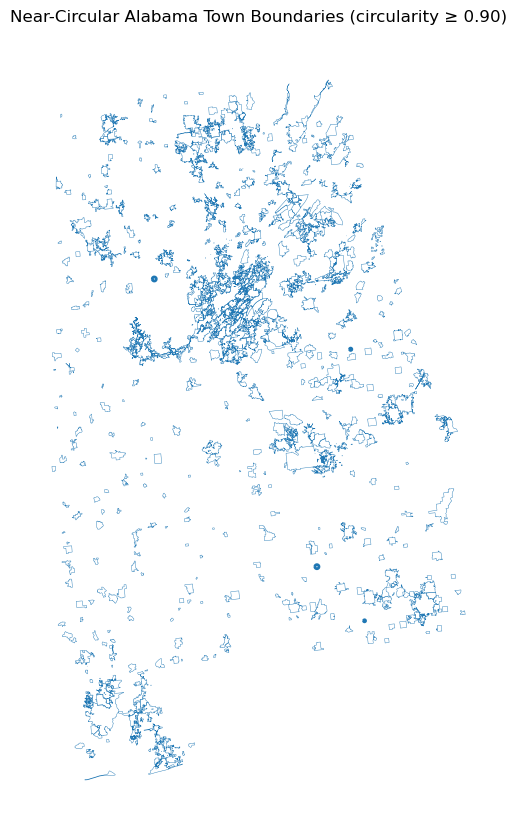

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
al2.boundary.plot(ax=ax, linewidth=0.3)
near.boundary.plot(ax=ax, linewidth=2.0)
ax.set_title("Near-Circular Alabama Town Boundaries (circularity ≥ 0.90)")
ax.set_axis_off()
plt.show()